# Glass Identification Project

# Project Description

**The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!**



**The chemical compositions are measured as the weight percent in corresponding oxide.**

# Attribute Information:

**1. Id number: 1 to 214**

**2. RI: refractive index**

**3.Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)**

**4.Mg: Magnesium**

**5.Al: Aluminum**

**6.Si: Silicon**

**7.K: Potassium**

**8.Ca: Calcium**

**9.Ba: Barium**

**10.Fe: Iron**

**11.Type of glass: (class attribute)**


• 1- building_windows_float_processed

• 2- building_windows_non_float_processed

• 3- vehicle_windows_float_processed

• 4- vehicle_windows_non_float_processed (none in this database)

• 5- containers

• 6- tableware

• 7- headlamps


**There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7).**

# To Predict : Type of glass

In [487]:
#Importing the necessory libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import joblib

from scipy.stats import zscore

from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier ,AdaBoostClassifier,BaggingClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


In [488]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv")

In [489]:
df.head(20) #Displaying the first 20 rows

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
6,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
7,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
8,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
9,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,1


**The Header of the Columns are missing,We have to arrive it based on given Attribute** 

In [490]:
#Defining the columns
Columns=['ID Number','RI(refractive index)','Na(Sodium)','Mg(Magnesium)','Al(Aluminum)','Si(Silicon)','K(Potassium)','Ca(Calcium)',
        'Ba(Barium)','Fe(Iron)','Types of glass']

In [491]:
url='https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv'
df=pd.read_csv(url,names=Columns)

In [492]:
df.head(10) #Displaying the first 10 rows

,ID Number,RI(refractive index),Na(Sodium),Mg(Magnesium),Al(Aluminum),Si(Silicon),K(Potassium),Ca(Calcium),Ba(Barium),Fe(Iron),Types of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [493]:
df.tail(10)   #Displaying the last 10 rows

,ID Number,RI(refractive index),Na(Sodium),Mg(Magnesium),Al(Aluminum),Si(Silicon),K(Potassium),Ca(Calcium),Ba(Barium),Fe(Iron),Types of glass
204,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


**=>The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes**


**==>This dataset have both numerical data which all are features,independent variable and categorical data which is label(target variable)**


**===>In this Dataset,"Type of Glass" is the target variable but it contains more than two categorical data(1,2,3,..) so,we have to turn it into binary classification which mentioned on problem statement((classes 1-4) is a window glass,(classes 5-7) is a non-window class**


**We have To Predict the 'Type of Glass'**

# Exploratory Data Analysis (EDA)(Non Graphical Analysis)

In [494]:
df.shape #checking the dimension of the dataset

(214, 11)

**Data set contains 214 rows and 11 Columns(from this 1 column is target variable ,then others are independent variables)**

In [495]:
print(f"Columns Names:{df.columns}") #columns of the dataset

Columns Names:Index(['ID Number', 'RI(refractive index)', 'Na(Sodium)', 'Mg(Magnesium)',
       'Al(Aluminum)', 'Si(Silicon)', 'K(Potassium)', 'Ca(Calcium)',
       'Ba(Barium)', 'Fe(Iron)', 'Types of glass'],
      dtype='object')


In [496]:
df.dtypes #data types of the data

ID Number                 int64
RI(refractive index)    float64
Na(Sodium)              float64
Mg(Magnesium)           float64
Al(Aluminum)            float64
Si(Silicon)             float64
K(Potassium)            float64
Ca(Calcium)             float64
Ba(Barium)              float64
Fe(Iron)                float64
Types of glass            int64
dtype: object

**This dataset contains**

**==>9 float64 value columns**

**==>2 int64 value columns**

In [497]:
#Checking the null values

df.isnull().sum().to_frame()

,0
ID Number,0
RI(refractive index),0
Na(Sodium),0
Mg(Magnesium),0
Al(Aluminum),0
Si(Silicon),0
K(Potassium),0
Ca(Calcium),0
Ba(Barium),0
Fe(Iron),0


**This Dataset doesn't have null values**

In [498]:
df.isnull().sum().sum() #Total sum of non-null values

0

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID Number             214 non-null    int64  
 1   RI(refractive index)  214 non-null    float64
 2   Na(Sodium)            214 non-null    float64
 3   Mg(Magnesium)         214 non-null    float64
 4   Al(Aluminum)          214 non-null    float64
 5   Si(Silicon)           214 non-null    float64
 6   K(Potassium)          214 non-null    float64
 7   Ca(Calcium)           214 non-null    float64
 8   Ba(Barium)            214 non-null    float64
 9   Fe(Iron)              214 non-null    float64
 10  Types of glass        214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


**Once again we can This Dataset doesn't have null values**

<Axes: >

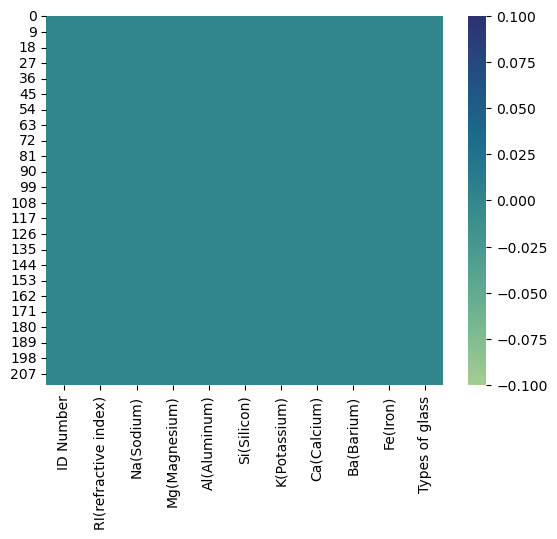

In [500]:
#Let's visualize using heatmap
sns.heatmap(df.isnull(),cmap='crest')

In [501]:
df.nunique().to_frame("No. of unique Values")

,No. of unique Values
ID Number,214
RI(refractive index),178
Na(Sodium),142
Mg(Magnesium),94
Al(Aluminum),118
Si(Silicon),133
K(Potassium),65
Ca(Calcium),143
Ba(Barium),34
Fe(Iron),32


**From above Analysis,ID Number has 214 Unique Values,this column only give out to identify each record but does'nt influence
the target variable.Therefore we can drop it**

# Dropping the Column

In [502]:
df.drop(['ID Number'],axis=1,inplace=True)
df.head(10)

,RI(refractive index),Na(Sodium),Mg(Magnesium),Al(Aluminum),Si(Silicon),K(Potassium),Ca(Calcium),Ba(Barium),Fe(Iron),Types of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [503]:
df.shape #Checking new dimension of the Dataset

(214, 10)

In [504]:
print(f"Columns Names:{df.columns}") #columns of the dataset after removal of the ID Column

Columns Names:Index(['RI(refractive index)', 'Na(Sodium)', 'Mg(Magnesium)', 'Al(Aluminum)',
       'Si(Silicon)', 'K(Potassium)', 'Ca(Calcium)', 'Ba(Barium)', 'Fe(Iron)',
       'Types of glass'],
      dtype='object')


In [505]:
df["Types of glass"].value_counts().to_frame() #Value Counts for Type of glass Column

,count
Types of glass,
2,76
1,70
7,29
3,17
5,13
6,9


In [506]:
df["Types of glass"].nunique() #total number of unique values for Types of glass

6

**Target variable contains 6 different categories we have to convert it into two categories based on promblem statement**

In [507]:
df["Types of glass"]=df["Types of glass"].apply(lambda x:7 if x >4 else 1)

In [508]:
df["Types of glass"].value_counts().to_frame()

,count
Types of glass,
1,163
7,51


**Now our Target variable has two Unique Values**

**==>1 for window glass**

**==>7 for non-window glass**

# Indepedent Variable Unique Columns

In [509]:
for i in range(9):
    print(df.iloc[:,i].value_counts()) #cheching the value count of each column of the Independent variable
    print('\n')

RI(refractive index)
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64


Na(Sodium)
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64


Mg(Magnesium)
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64


Al(Aluminum)
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64


Si(Silicon)
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: count, Length: 133, dtype: int64


K(Potassium)
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73    

# Summerical stastics of the numerical variables

In [510]:
df.describe()

,RI(refractive index),Na(Sodium),Mg(Magnesium),Al(Aluminum),Si(Silicon),K(Potassium),Ca(Calcium),Ba(Barium),Fe(Iron),Types of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.429907
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.562321
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,1.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,1.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


**There is no negative value present**

**There is no missing values**

**The mean value is greater than the median(50%) in Na(sodium),AI(aluminium),Ca(Calcium),Ba(Barium) and Fe(Iron) columns which means the data is skewed to right.**

**The data in the columns Mg(Magnesium),Si(Silicon),K(Potassium) have mean value less than median which means the data is left skewed**

**The column RI(refractive index) have the median and mean are very close to each other**

**By summarizing the data we can observe there is a huge difference between 75% and max in many columns, hence there are outliers presented in the data**


**we can also notice the standard deviation,min,25% percentile value from this describe method**

**Ignore the Types of glass column because it is our target variable(categorical column)**

# Removing Duplicate Rows

In [511]:
df[df.duplicated()] #Displaying the duplicated rows

,RI(refractive index),Na(Sodium),Mg(Magnesium),Al(Aluminum),Si(Silicon),K(Potassium),Ca(Calcium),Ba(Barium),Fe(Iron),Types of glass
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [512]:
df.drop_duplicates(inplace=True)  #Dropping the duplicated rows

In [513]:
df.shape  #Dimension of the data after removing the duplicated rows

(213, 10)

# Data Visulisation(Grapical Analysis)

# Univarite Analysis

# Target Feature

,count
Types of glass,
1,162
7,51


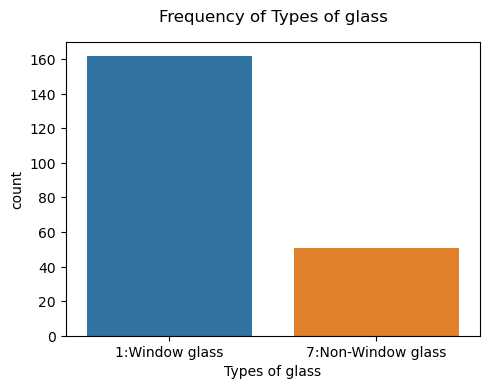

In [514]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x='Types of glass',data=df)
plt.title("Frequency of Types of glass",y=1.04)
plt.xticks((0,1),['1:Window glass','7:Non-Window glass'])
plt.tight_layout()
df['Types of glass'].value_counts().to_frame()

**From above analysis**

  **==>1:Window glass has 162 records**
  
  **==>7:Non-Window has 51 records**
  
 **Our target variable is imbalanced**

# Bivariate Analysis(comparing each feature with target variable)

**Note:Ignore the black line in the bar graph it indicates some type of server error.**

In [515]:
target_variable=df['Types of glass']
features=df.drop('Types of glass',axis=1)  #Separating feature and target variable for analysis

# 1)RI(refractive index)

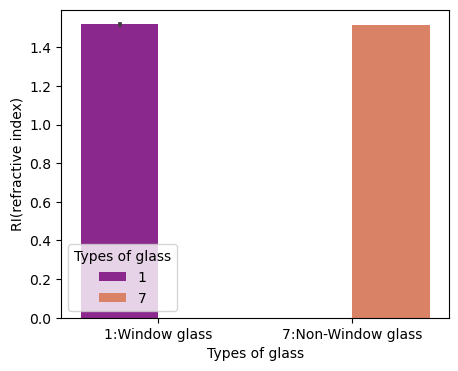

In [516]:
plt.figure(figsize=(5,4))
sns.barplot(x=target_variable,y=features['RI(refractive index)'],data=df,palette='plasma',hue=target_variable)
plt.xticks((0,1),['1:Window glass','7:Non-Window glass'])
plt.show()

**From above Analysis 1) RI(refractive index) Vs Types of glass==>patterns are almost same which means the composition of RI(refractive index) in Window glass and non-window glass are equal level**

# 2) Na(Sodium)

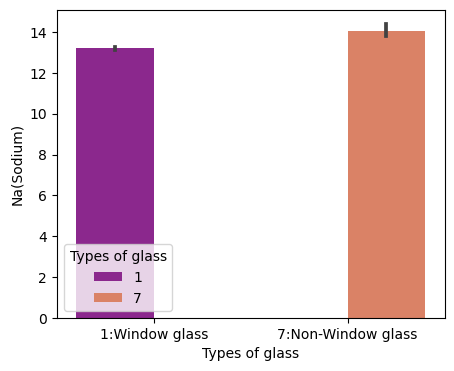

In [517]:
plt.figure(figsize=(5,4))
sns.barplot(x=target_variable,y=features['Na(Sodium)'],data=df,palette='plasma',hue=target_variable)
plt.xticks((0,1),['1:Window glass','7:Non-Window glass'])
plt.show()

**From above Analysis 2) Na(Sodium) Vs Types of glass==>patterns in Non-Window glass was larger  which means the composition of Na(Sodium) in non-Window glass is high when compare to window glass**

# 3) Mg(Magnesium)

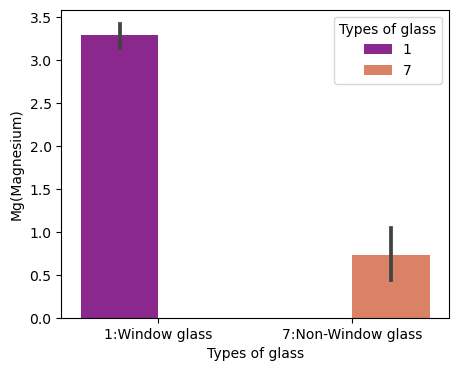

In [518]:
plt.figure(figsize=(5,4))
sns.barplot(x=target_variable,y=features['Mg(Magnesium)'],data=df,palette='plasma',hue=target_variable)
plt.xticks((0,1),['1:Window glass','7:Non-Window glass'])
plt.show()

**From above Analysis 3) Mg(Magnesium) Vs Types of glass==>patterns in Window glass was very large which means the composition of Mg(Magnesium) in window glass is high when compare to non-window glass**

# 4) Al(Aluminum)

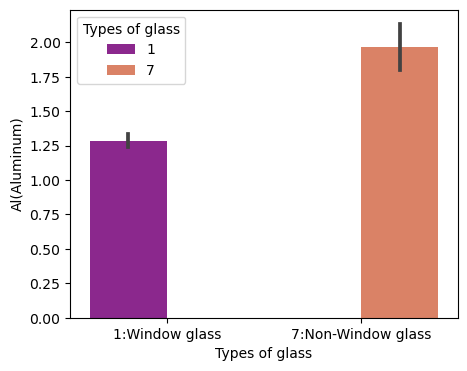

In [519]:
plt.figure(figsize=(5,4))
sns.barplot(x=target_variable,y=features['Al(Aluminum)'],data=df,palette='plasma',hue=target_variable)
plt.xticks((0,1),['1:Window glass','7:Non-Window glass'])
plt.show()

**From above Analysis 4) Al(Aluminum) Vs Types of glass==>patterns in non-Window glass was very large which means the composition of Al(Aluminum) in non-window glass is high when compare to window glass**

# 5) Si(Silicon)

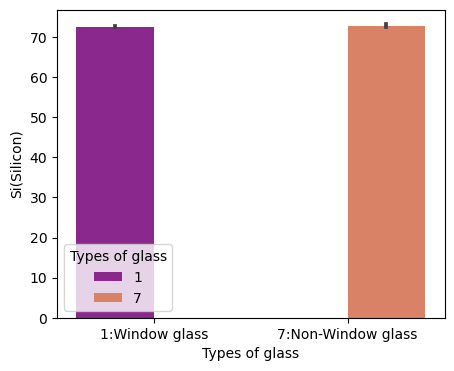

In [520]:
plt.figure(figsize=(5,4))
sns.barplot(x=target_variable,y=features['Si(Silicon)'],data=df,palette='plasma',hue=target_variable)
plt.xticks((0,1),['1:Window glass','7:Non-Window glass'])
plt.show()

**From above Analysis 5) Si(Silicon) Vs Types of glass==>patterns are almost same which means the composition of RI(refractive index) in Window glass and non-window glass are equal level**

# 6) K(Potassium)

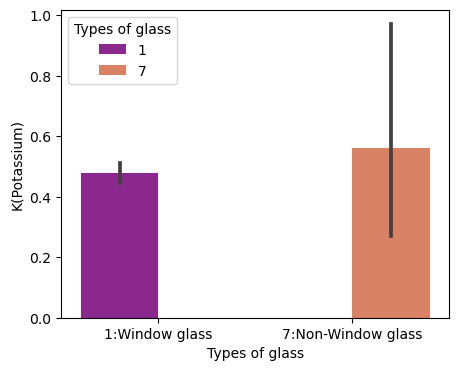

In [521]:
plt.figure(figsize=(5,4))
sns.barplot(x=target_variable,y=features['K(Potassium)'],data=df,palette='plasma',hue=target_variable)
plt.xticks((0,1),['1:Window glass','7:Non-Window glass'])
plt.show()

**From above Analysis 6) K(Potassium) Vs Types of glass==>patterns in non-Window glass was  large which means the composition of K(Potassium) in non-window glass is high when compare to window glass**

# 7) Ca(Calcium)

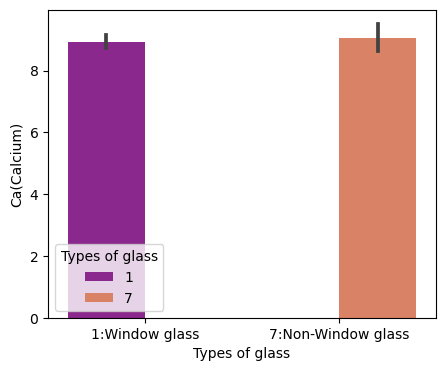

In [522]:
plt.figure(figsize=(5,4))
sns.barplot(x=target_variable,y=features['Ca(Calcium)'],data=df,palette='plasma',hue=target_variable)
plt.xticks((0,1),['1:Window glass','7:Non-Window glass'])
plt.show()

**From above Analysis 7) Ca(Calcium) Vs Types of glass==>patterns are almost same which means the composition of Ca(Calcium) in Window glass and non-window glass are equal level**

# 8)Ba(Barium)

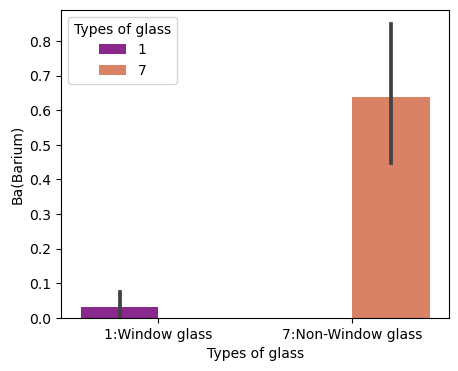

In [523]:
plt.figure(figsize=(5,4))
sns.barplot(x=target_variable,y=features['Ba(Barium)'],data=df,palette='plasma',hue=target_variable)
plt.xticks((0,1),['1:Window glass','7:Non-Window glass'])
plt.show()

**From above Analysis 8) Ba(Barium) Vs Types of glass==>patterns in non-Window glass was very large which means the composition of Ba(Barium) in non-window glass is very high when compare to window glass**

# 9)Fe(Iron)

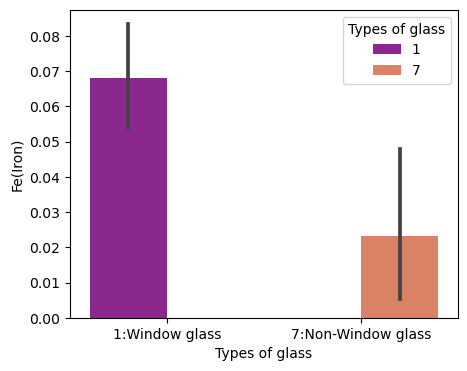

In [524]:
plt.figure(figsize=(5,4))
sns.barplot(x=target_variable,y=features['Fe(Iron)'],data=df,palette='plasma',hue=target_variable)
plt.xticks((0,1),['1:Window glass','7:Non-Window glass'])
plt.show()

**From above Analysis 9) Fe(Iron) Vs Types of glass==>patterns in Window glass was very large which means the composition of Fe(Iron) in window glass is very high when compare to non-window glass**

# Now We can say to get Window glass or Non-window glass which Composition is highly needed or lowly needed based on that we will make the glasses

# Checking Outliers(using boxplot)

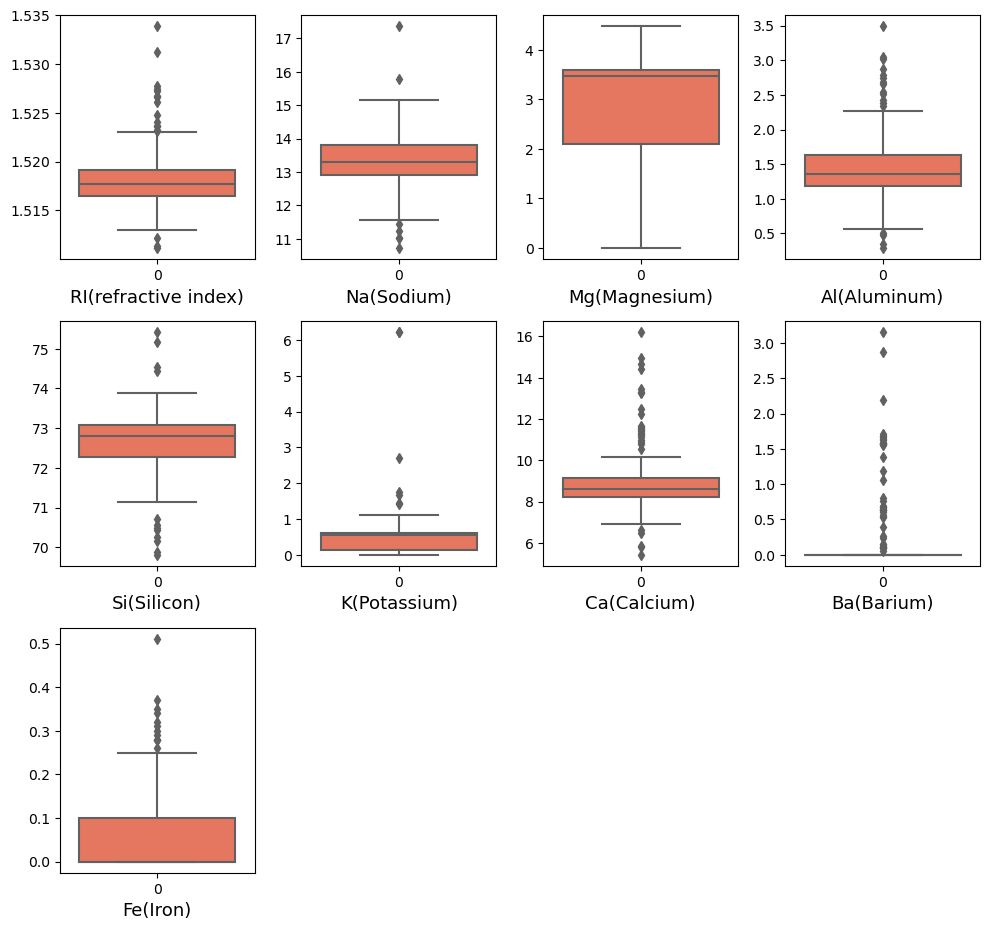

In [525]:
plt.figure(figsize=(10,12),facecolor ="white")
plotnumber = 1
for column in df:
    if plotnumber<=9:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column],palette="Reds")
        plt.xlabel(column,fontsize=13)
        plt.yticks(rotation=0,fontsize=10)
        plotnumber+=1
plt.tight_layout()
plt.show() 

**From above analysis we can see outliers presented clearly in the Columns except Mg(Magnesium),retaining much data as possible from outliers**

# Checking Skewness

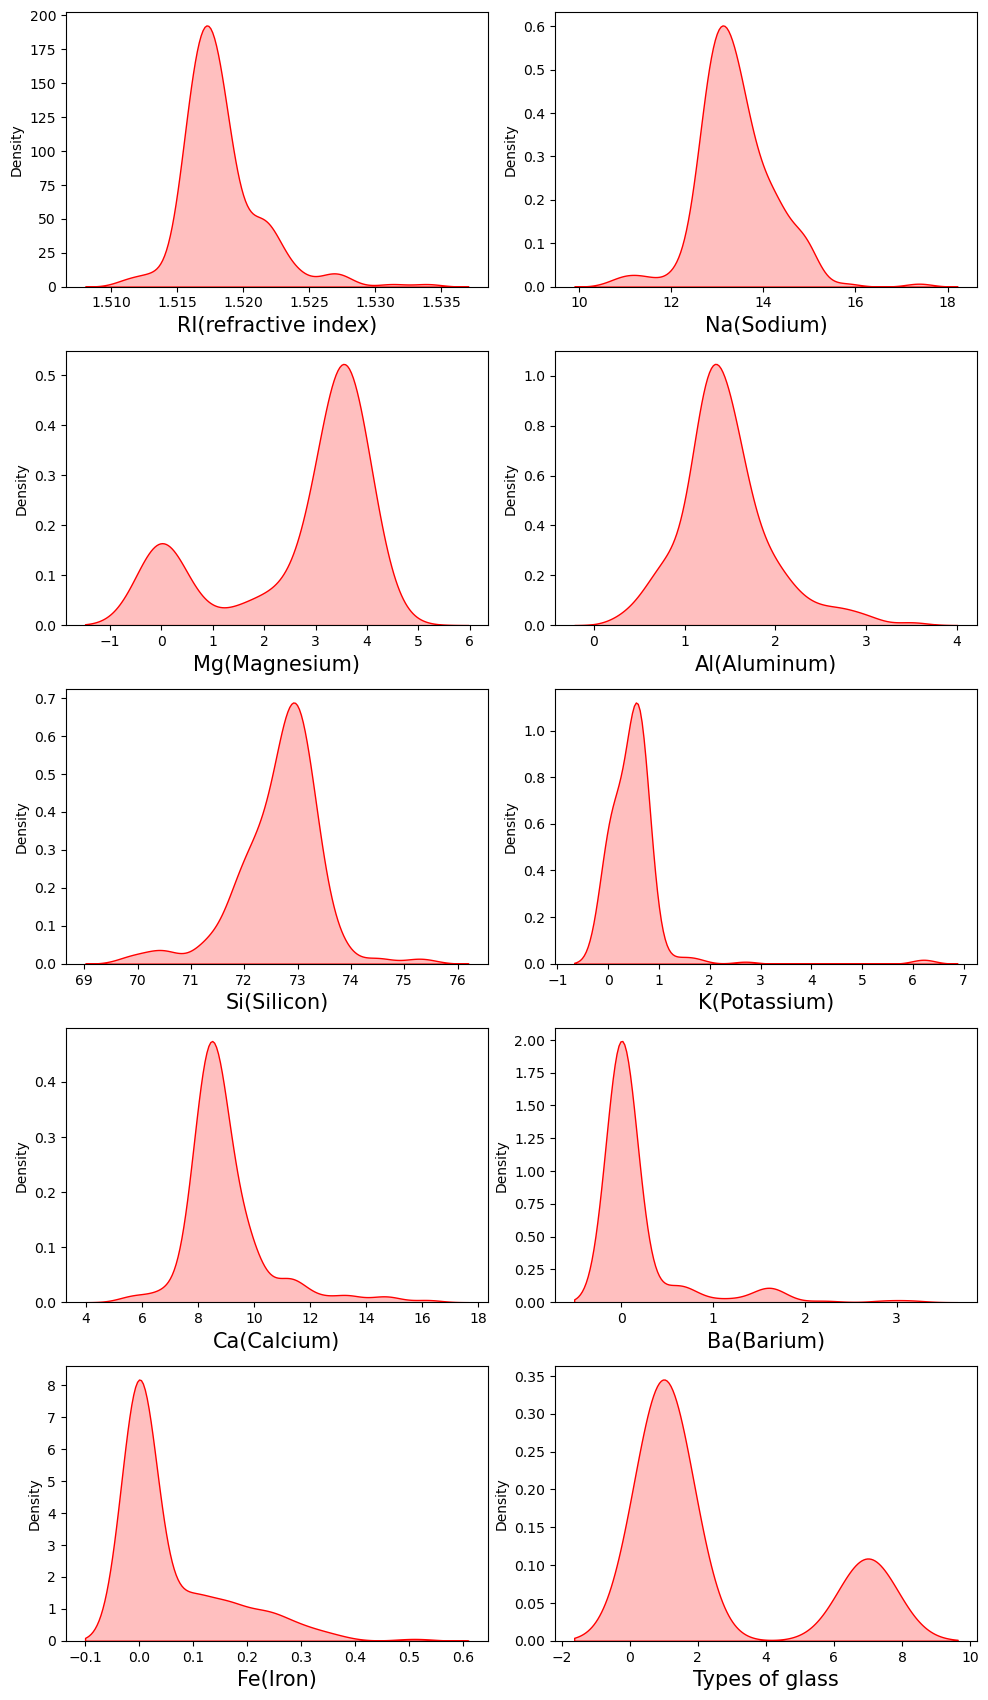

In [526]:
plt.figure(figsize=(10,20),facecolor ="white")
plotnumber = 1
for column in df:
    if plotnumber<=10:
        ax = plt.subplot(6,2,plotnumber)
        sns.distplot(df[column],color='r',hist=False,kde_kws={"shade":True})
        plt.xlabel(column,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)        
    plotnumber+=1
plt.tight_layout()
plt.show()

**From above analysis we can see some columns showing proper bell shape curve but some of them showing skewness ,We will deal this in Data preprocessing**

**We will see before and after removal of outliers and skewness which makes our model performance best with help of accuracy score**

**from seeing model performance ,before and after removal of outliers and skewness ,model performance is good when the outliers and skewness are removed**

# Correlation Using heatmap

In [527]:
df.corr()

,RI(refractive index),Na(Sodium),Mg(Magnesium),Al(Aluminum),Si(Silicon),K(Potassium),Ca(Calcium),Ba(Barium),Fe(Iron),Types of glass
RI(refractive index),1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.131638
Na(Sodium),-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.456296
Mg(Magnesium),-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.757881
Al(Aluminum),-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.586513
Si(Silicon),-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.145630
K(Potassium),-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,0.052294
Ca(Calcium),0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.041853
Ba(Barium),0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.523014
Fe(Iron),0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.196747
Types of glass,-0.131638,0.456296,-0.757881,0.586513,0.145630,0.052294,0.041853,0.523014,-0.196747,1.000000


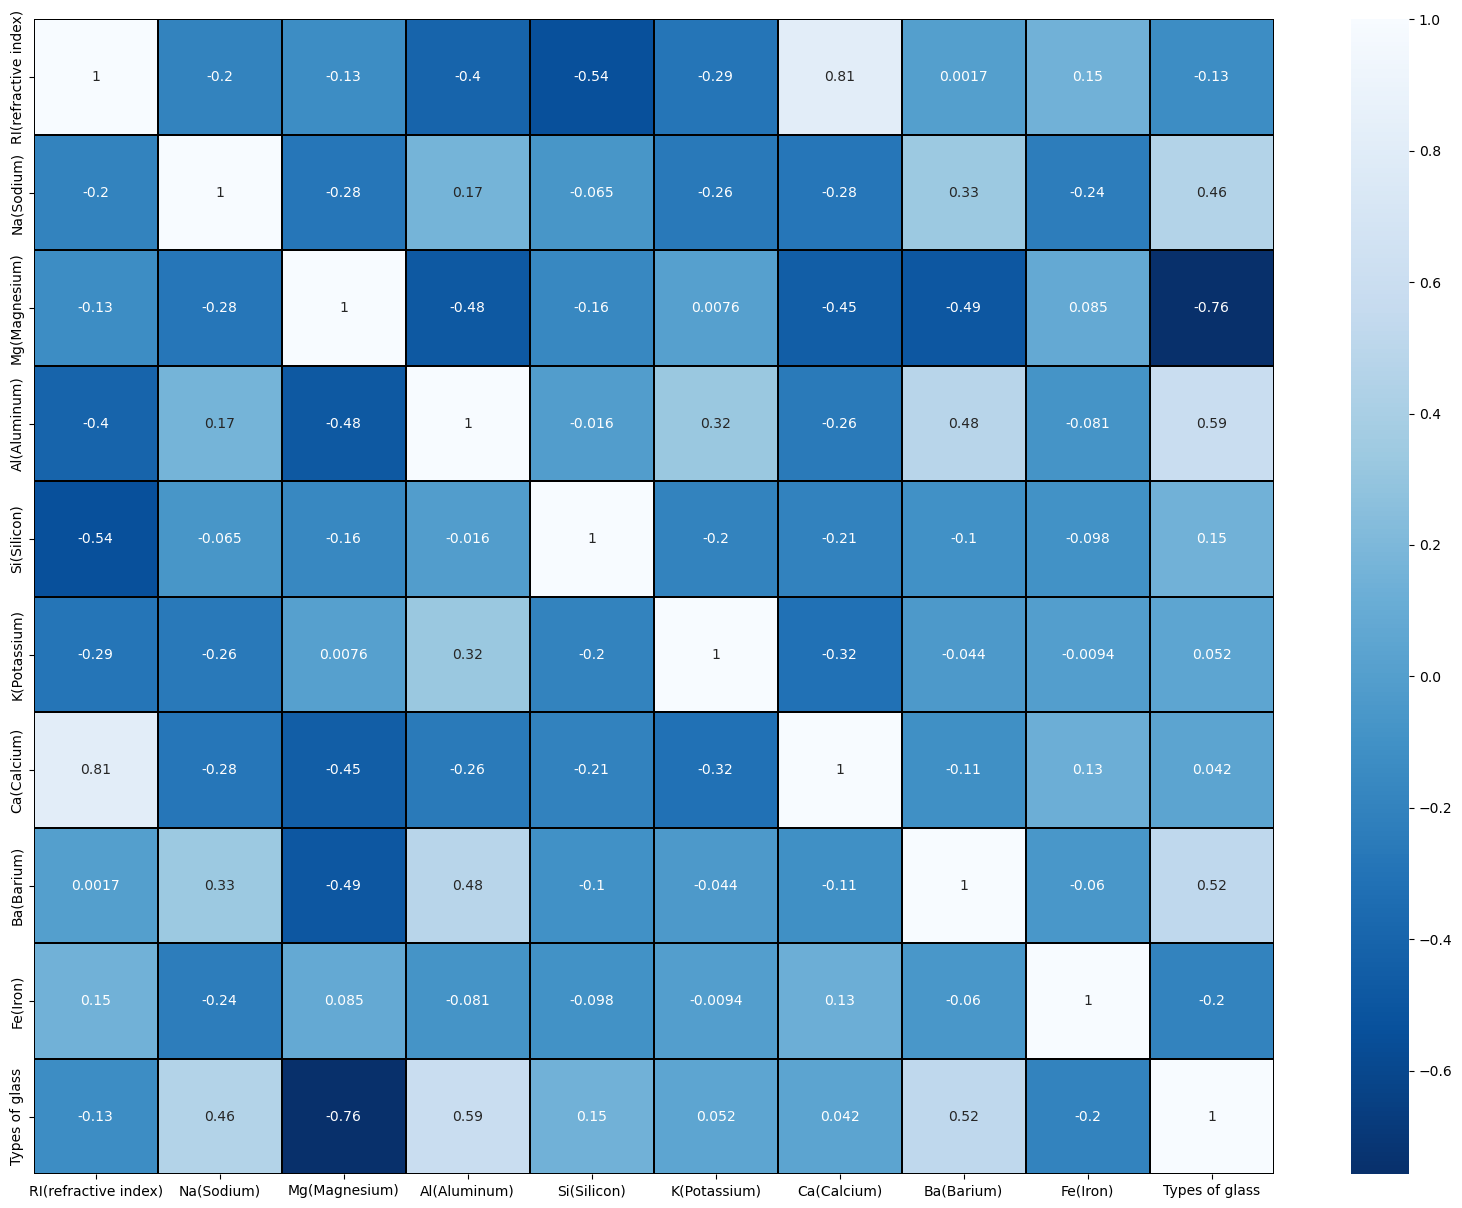

In [528]:
df_corr=df.corr()

lower_triangle=np.tril(df.corr())

plt.figure(figsize=(20,15))

sns.heatmap(df_corr,annot=True,cmap='Blues_r',linewidths=0.1,fmt='.2g',linecolor='black')

plt.show()

**==>0-no relation**

**==>-0.3 to 0.3 less relation**

**==>greater than -0.5 or 0.5 greater than(moderate correlation)**

**==>greater than -0.7 or 0.7 greater than(high correlation)**

**1) From above heatmap we can see,there are positive correlation and negative correlation between label and feature columns**

**2)Mg(Magnesium)and Al(Aluminium) are highly correlated with target With a value of Mg(-0.76) and Al(0.59) which is close to 1(high correlation)**

**3)The Column Na(0.46) Sodium and Ba(0.52) Barium moderately positive correlated with target**

**4)The label is negative correlated with Mg(-0.76), Fe(-0.2), and RI (-0.13).**

**5)The Column  K(0.052)Potassium and Ca(0.042)Calcium have a low impact on the target variable.**

**6)The strongest positive correlations between the independent features are:**

 **==>RI(refractive index)/Ca(Calcium): 0.81 (High Correlation)**
 

# Preprocessing Data

### 1)Removing Outliers using zscore method

In [529]:
z = np.abs(zscore(df))
z

,RI(refractive index),Na(Sodium),Mg(Magnesium),Al(Aluminum),Si(Silicon),K(Potassium),Ca(Calcium),Ba(Barium),Fe(Iron),Types of glass
0,0.879840,0.289558,1.257238,0.706370,1.133248,0.673480,0.143466,0.353808,0.588301,0.561084
1,0.243816,0.596403,0.639311,0.180863,0.097037,0.028962,0.790201,0.353808,0.588301,0.561084
2,0.716412,0.154546,0.604596,0.182950,0.433746,0.167073,0.825349,0.353808,0.588301,0.561084
3,0.227291,0.238216,0.701798,0.322346,0.058368,0.109149,0.516041,0.353808,0.588301,0.561084
4,0.306608,0.164573,0.653197,0.423405,0.550299,0.078457,0.621487,0.353808,0.588301,0.561084
...,...,...,...,...,...,...,...,...,...,...
209,0.699888,0.903249,1.860172,2.891336,0.058368,0.642789,0.158812,1.778672,0.588301,1.782266
210,0.494986,1.860605,1.860172,1.092483,0.524398,0.765554,0.389506,2.844912,0.588301,1.782266
211,0.760865,1.173272,1.860172,1.153118,0.990612,0.765554,0.361387,2.945501,0.588301,1.782266
212,0.607351,1.197820,1.860172,0.991424,1.236668,0.765554,0.333268,2.804676,0.588301,1.782266


In [530]:
df= df[(z<3).all(axis=1)]  #thresold=3

In [531]:
df.shape  #New dimension ot the data after removing outliers(193 rows and 10 columns)

(193, 10)

# 2)Removing Skewness

In [532]:
df.skew().sort_values(ascending=False).to_frame("Skewness")

,Skewness
Ba(Barium),3.178256
Fe(Iron),1.478611
Types of glass,1.455790
Ca(Calcium),1.089590
RI(refractive index),0.972271
Al(Aluminum),0.700499
Na(Sodium),0.384484
K(Potassium),0.295387
Si(Silicon),-0.436027
Mg(Magnesium),-1.521807


**Acceptable range for skewness is -0.5 to +0.5**

**So,the Skewness is presented in Ba(Barium),Fe(Iron),Ca(Calcium),RI(refractive index),Al(Aluminum) and Mg(Magnesium)**

In [533]:
#Checking Skewness after applying cuberoot and log method which chooses the best one  
skewness_columns=['Ba(Barium)','Fe(Iron)','Ca(Calcium)','RI(refractive index)','Al(Aluminum)','Mg(Magnesium)']
df_transformed=pd.DataFrame()

for col in skewness_columns:
    df_transformed[f"{col}_cbrt"]=np.cbrt(df[col])
    df_transformed[f"{col}_log"]=np.log(df[col])
    
df_transformed=pd.concat([df_transformed,df[skewness_columns]],axis=1)

In [534]:
df_transformed.skew().sort_index(ascending=False).to_frame("Skewness") #comparing which transform method gives best result

,Skewness
RI(refractive index)_log,0.965084
RI(refractive index)_cbrt,0.967479
RI(refractive index),0.972271
Mg(Magnesium)_log,NaN
Mg(Magnesium)_cbrt,-1.890893
Mg(Magnesium),-1.521807
Fe(Iron)_log,NaN
Fe(Iron)_cbrt,0.875093
Fe(Iron),1.478611
Ca(Calcium)_log,0.347263


**After comparing the skewness:**
    
   **==>log method give a better skewness for Ca and RI.**
    
   **==>cuberoot method give a better skewness for Ba,Fe and Al.**
   
   **==>Mg gives NaN for log and gives -1.89 for cuberoot which is bigger than existing skewness**

In [535]:
#Appling skewness method for respective columns 

for col in ['Ca(Calcium)','RI(refractive index)']:
    df[col]=df_transformed[f"{col}_log"]

for col in ['Ba(Barium)','Fe(Iron)','Al(Aluminum)']:
    df[col]=df_transformed[f"{col}_cbrt"]

In [536]:
df.skew().sort_values(ascending=False).to_frame("Skewness after Transformation")

,Skewness after Transformation
Ba(Barium),2.198820
Types of glass,1.455790
RI(refractive index),0.965084
Fe(Iron),0.875093
Na(Sodium),0.384484
Ca(Calcium),0.347263
K(Potassium),0.295387
Al(Aluminum),-0.322260
Si(Silicon),-0.436027
Mg(Magnesium),-1.521807


# Visualizing skewness after removing Skewness

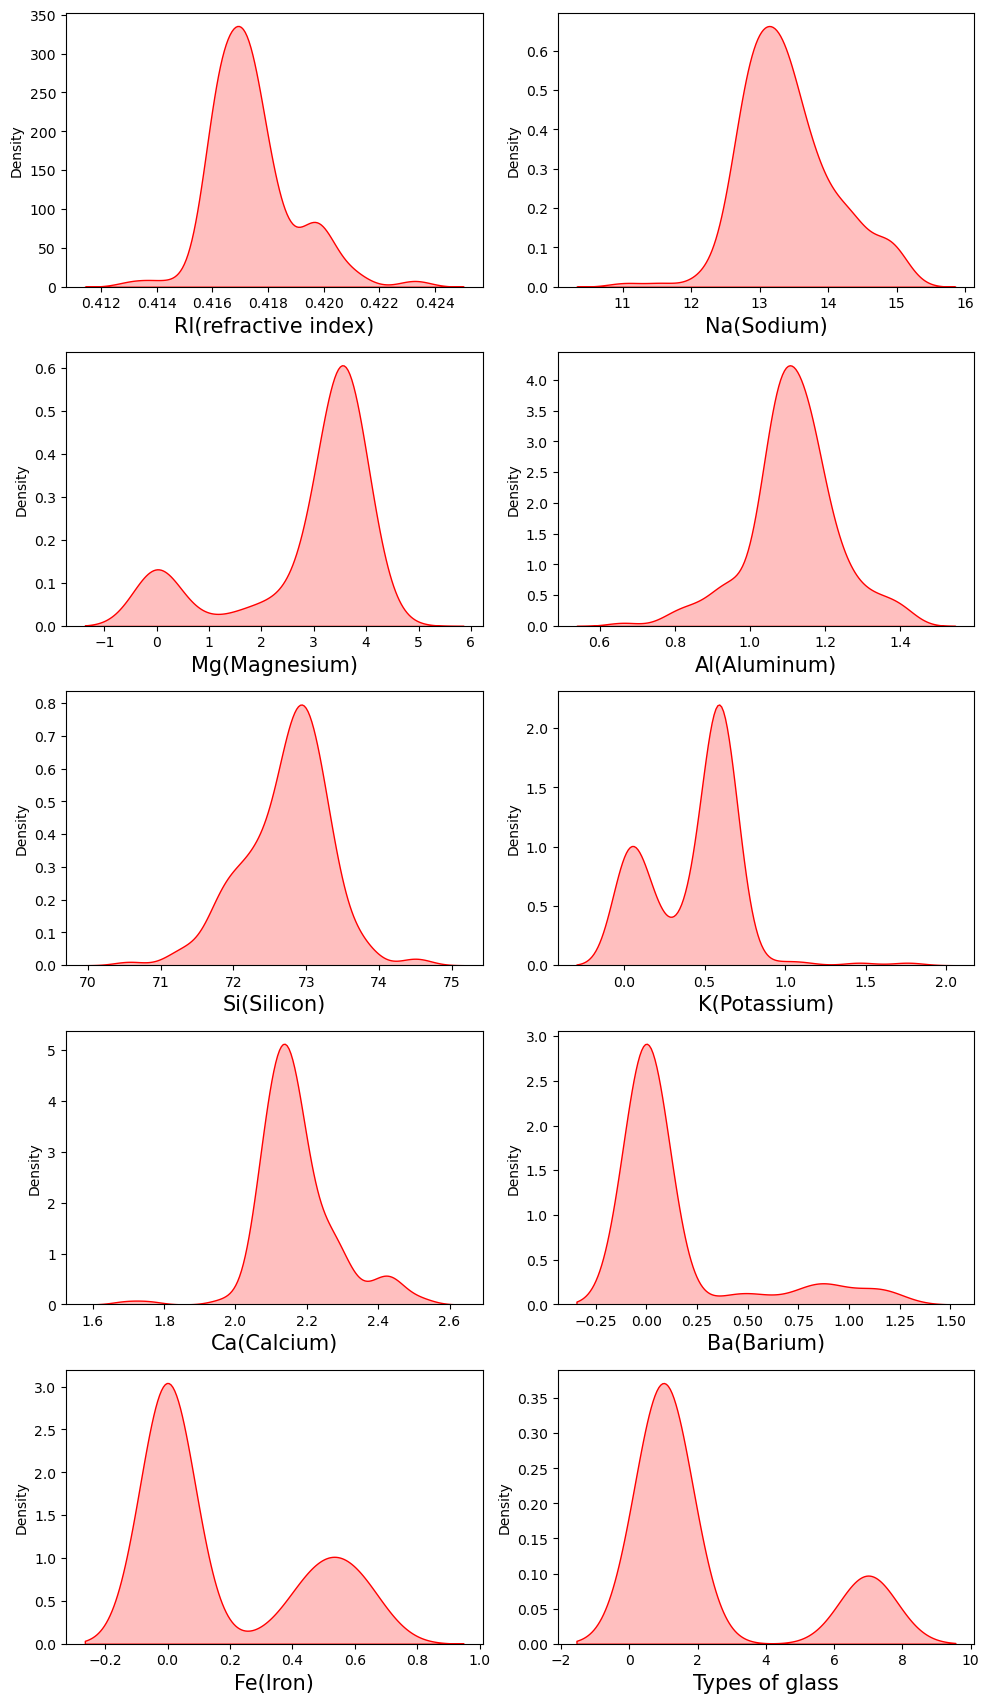

In [537]:
plt.figure(figsize=(10,20),facecolor ="white")
plotnumber = 1
for column in df:
    if plotnumber<=10:
        ax = plt.subplot(6,2,plotnumber)
        sns.distplot(df[column],color='r',hist=False,kde_kws={"shade":True})
        plt.xlabel(column,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)        
    plotnumber+=1
plt.tight_layout()
plt.show()

# Separting features and labels(to build model)

In [538]:
x=df.drop('Types of glass',axis=1)
y=df['Types of glass']

In [539]:
print(f"Feature Dimension ={x.shape}")
print(f"Label Dimension ={y.shape}")

Feature Dimension =(193, 9)
Label Dimension =(193,)


# Feature Scaling using Standard Scalarization

In [540]:
scalar=StandardScaler()
x=pd.DataFrame(scalar.fit_transform(x),columns=x.columns)
x

,RI(refractive index),Na(Sodium),Mg(Magnesium),Al(Aluminum),Si(Silicon),K(Potassium),Ca(Calcium),Ba(Barium),Fe(Iron)
0,1.308881,0.338598,1.235597,-0.693567,-1.627964,-1.326595,-0.019157,-0.416569,-0.680595
1,-0.189093,0.711257,0.554625,-0.050415,0.007672,0.166308,-1.043086,-0.416569,-0.680595
2,-0.820126,0.174628,0.516368,0.348040,0.455320,-0.153600,-1.102131,-0.416569,-0.680595
3,-0.167040,-0.302375,0.623487,-0.214872,-0.198935,0.486216,-0.595068,-0.416569,-0.680595
4,-0.272903,-0.212937,0.569928,-0.336020,0.610274,0.415125,-0.764815,-0.416569,-0.680595
...,...,...,...,...,...,...,...,...,...
188,-0.723006,1.426762,-2.199867,2.426822,0.214279,-1.539867,0.690194,2.063771,-0.680595
189,-0.798052,1.083916,-2.199867,2.626079,-0.198935,-1.255504,0.423016,2.689053,-0.680595
190,-0.524393,2.246611,-2.199867,1.223843,0.575840,-1.539867,-0.395414,3.138481,-0.680595
191,1.150430,1.411856,-2.199867,1.277311,1.195660,-1.539867,-0.351627,3.175362,-0.680595


# Checking Variance inflation factor (VIF) 

In [541]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))] #checking vif for Multicollinearity analysis and feature correlation
vif['features']=x.columns

vif

,VIF values,features
0,4.930595,RI(refractive index)
1,16.977269,Na(Sodium)
2,42.084375,Mg(Magnesium)
3,6.110079,Al(Aluminum)
4,11.397541,Si(Silicon)
5,7.345681,K(Potassium)
6,29.056433,Ca(Calcium)
7,5.447298,Ba(Barium)
8,1.056915,Fe(Iron)


**If VIF value is greater than 10,consider it as a sign of multicollinearity ,therefore we can find the feature Na(Sodium),Mg(Magnesium),Si(Silicon) and Ca(Calcium) have VIF value greater than 10 which means they have high correlation with 
other features**

**The relationship between the target variable and Ca(Calcium) is weaker compared to the relation of Mg(Magnesium) and the target variable,we will grop Ca(Calcium) then see the VIF value.**

In [542]:
x=x.drop('Ca(Calcium)',axis=1)  #Droping Ca(Calcium) column

In [543]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))] #checking vif for Multicollinearity analysis and feature correlation
vif['features']=x.columns

vif

,VIF values,features
0,4.770396,RI(refractive index)
1,4.098489,Na(Sodium)
2,4.866654,Mg(Magnesium)
3,3.118087,Al(Aluminum)
4,4.511179,Si(Silicon)
5,2.627784,K(Potassium)
6,2.244434,Ba(Barium)
7,1.050669,Fe(Iron)


**We have solved the Multicollinearity issue**

# Balancing the Data

In [544]:
y.value_counts().to_frame()

,count
Types of glass,
1,153
7,40


**Our Data are Imbalanced here,we have to deal this with OVERSAMPLING METHOD SMOTE**

In [545]:
SME=SMOTE()
x,y=SME.fit_resample(x,y)

In [546]:
y.value_counts().to_frame()

,count
Types of glass,
1,153
7,153


**We could see the Data are Balanced now**

In [547]:
x #displaying feature

,RI(refractive index),Na(Sodium),Mg(Magnesium),Al(Aluminum),Si(Silicon),K(Potassium),Ba(Barium),Fe(Iron)
0,1.308881,0.338598,1.235597,-0.693567,-1.627964,-1.326595,-0.416569,-0.680595
1,-0.189093,0.711257,0.554625,-0.050415,0.007672,0.166308,-0.416569,-0.680595
2,-0.820126,0.174628,0.516368,0.348040,0.455320,-0.153600,-0.416569,-0.680595
3,-0.167040,-0.302375,0.623487,-0.214872,-0.198935,0.486216,-0.416569,-0.680595
4,-0.272903,-0.212937,0.569928,-0.336020,0.610274,0.415125,-0.416569,-0.680595
...,...,...,...,...,...,...,...,...
301,-0.403334,1.941563,-2.199867,1.235193,0.591732,-1.539867,3.135752,1.012966
302,0.608053,0.555511,-0.346773,-0.459191,0.050943,-1.512548,-0.416569,-0.680595
303,0.828517,-0.292293,-2.199867,0.776435,0.628941,0.103730,-0.416569,-0.680595
304,0.693420,-1.132699,-1.995827,0.635434,1.500757,-0.076423,-0.416569,-0.680595


In [548]:
y #displaying label

0      1
1      1
2      1
3      1
4      1
      ..
301    7
302    7
303    7
304    7
305    7
Name: Types of glass, Length: 306, dtype: int64

# Modeling

# Finding the best random state

In [549]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc> maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is ",maxAccu,"at random state",maxRS)

Best Accuracy is  1.0 at random state 3


# Creating train test split

In [550]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=maxRS)

# Creating a Function with accuracy score,confusion matrix,classification report and difference between accuracy score and cross validation

In [551]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================Train Result=============")
        
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")  #accuracy score for train result
              
    
    elif train==False:
        pred=clf.predict(x_test)
              
        print("\n================Test Result=============")
        
        print(f" \n \n Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")  #accuracy score for test result
        
        print(f"  \n \n Confusion matrix: \n {confusion_matrix(y_test,pred)}") #confusion matrix for test result
              
        print("\n \n Test Classification Report \n",classification_report(y_test,pred,digits=2)) #classification result for test result
        
        
        score=cross_val_score(clf,x,y)
        print('\n', score)
        print('\n' ,score.mean())
        print(" \n \n Difference between accuracy score and cross validation is:",accuracy_score(y_test,pred)-score.mean()) #Difference between accuracy score and cross validation(to find which model is best)

# LogisticRegression

In [552]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [553]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:97.10%

================Test Result=============
 
 
 Accuracy Score:100.00%
  
 
 Confusion matrix: 
 [[14  0]
 [ 0 16]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 [0.9516129  0.98360656 1.         0.91803279 0.96721311]

 0.9640930724484399
 
 
 Difference between accuracy score and cross validation is: 0.03590692755156011


# RandomForestClassifier

In [554]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [555]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 
 Accuracy Score:96.67%
  
 
 Confusion matrix: 
 [[13  1]
 [ 0 16]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           7       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


 [0.96774194 1.         0.98360656 0.93442623 0.98360656]

 0.9738762559492333
 
 
 Difference between accuracy score and cross validation is: -0.007209589282566653


# SVC(Support Vector Machine Classifier)

In [556]:
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [557]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:98.55%

================Test Result=============
 
 
 Accuracy Score:100.00%
  
 
 Confusion matrix: 
 [[14  0]
 [ 0 16]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 [0.98387097 1.         1.         0.96721311 0.98360656]

 0.9869381279746167
 
 
 Difference between accuracy score and cross validation is: 0.013061872025383336


# GradientBoostingClassifier

In [558]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [559]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 
 Accuracy Score:96.67%
  
 
 Confusion matrix: 
 [[14  0]
 [ 1 15]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           7       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


 [0.98387097 1.         1.         0.93442623 1.        ]

 0.9836594394500263
 
 
 Difference between accuracy score and cross validation is: -0.016992772783359644


# AdaBoostClassifier

In [560]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [561]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 
 Accuracy Score:90.00%
  
 
 Confusion matrix: 
 [[13  1]
 [ 2 14]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           7       0.93      0.88      0.90        16

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


 [0.9516129  1.         0.98360656 0.93442623 0.98360656]

 0.9706504494976202
 
 
 Difference between accuracy score and cross validation is: -0.07065044949762023


# ExtraTreesClassifier

In [562]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [563]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 
 Accuracy Score:96.67%
  
 
 Confusion matrix: 
 [[14  0]
 [ 1 15]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           7       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


 [0.96774194 1.         0.98360656 0.96721311 0.98360656]

 0.9804336329984136
 
 
 Difference between accuracy score and cross validation is: -0.0137669663317469


# BaggingClassifier

In [564]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [565]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:99.64%

================Test Result=============
 
 
 Accuracy Score:100.00%
  
 
 Confusion matrix: 
 [[14  0]
 [ 0 16]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 [0.93548387 1.         0.98360656 0.96721311 1.        ]

 0.977260708619778
 
 
 Difference between accuracy score and cross validation is: 0.022739291380222015


# DecisionTreeClassifier

In [566]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [567]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 
 Accuracy Score:96.67%
  
 
 Confusion matrix: 
 [[14  0]
 [ 1 15]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           7       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


 [0.96774194 1.         0.96721311 0.95081967 1.        ]

 0.9771549444738235
 
 
 Difference between accuracy score and cross validation is: -0.010488277807156776


**Checking Difference between accuracy score and cross validation,the model AdaBoostClassifier has lowest value so AdaBoostClassifier is our best model.**

# HyperParameter Tuning

In [568]:
param={'n_estimators':[50,100,200,300],
        'learning_rate':[0.01,0.1,0.5,1.0],
         'algorithm':['SAMME','SAMME.R'],
         'random_state':[10,50,1000]}

In [569]:
RSCV=RandomizedSearchCV(AdaBoostClassifier(),param,cv=5)

In [570]:
RSCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'n_estimators': [50, 100, 200, 300],
                                        'random_state': [10, 50, 1000]})

In [571]:
RSCV.best_params_

{'random_state': 10,
 'n_estimators': 300,
 'learning_rate': 0.5,
 'algorithm': 'SAMME.R'}

# Final Model

In [572]:
final_model=AdaBoostClassifier(
 learning_rate=0.5,
 n_estimators= 300,
 algorithm='SAMME.R',
 random_state= 10)

In [573]:
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.0


# Saving the model

In [574]:
joblib.dump(final_model,'Glass Identification Project.pkl')

['Glass Identification Project.pkl']

# Predicting the saved Model

In [575]:
model=joblib.load('Glass Identification Project.pkl')

In [576]:
prediction=model.predict(x_test)
prediction

array([1, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 7, 1, 1, 1, 7, 7, 7, 1, 1, 1, 1,
       1, 7, 7, 7, 1, 7, 1, 7], dtype=int64)

In [577]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1,7
1,7,7
2,7,7
3,7,7
4,7,7
5,7,7
6,7,1
7,1,1
8,1,1
9,1,1
